In [88]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

In [87]:
df = pd.read_csv('Customertravel.csv')

In [5]:
df.shape

(954, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [7]:
df.head(5)

Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0   34            No     Middle Income              6   
1   34           Yes        Low Income              5   
2   37            No     Middle Income              3   
3   30            No     Middle Income              2   
4   30            No        Low Income              1   

  AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                         No              Yes       0  
1                        Yes               No       1  
2                        Yes               No       0  
3                         No               No       0  
4                         No               No       0

In [8]:
# Check whether there is null data
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [9]:
df.describe()

Age  ServicesOpted      Target
count  954.000000     954.000000  954.000000
mean    32.109015       2.437107    0.234801
std      3.337388       1.606233    0.424097
min     27.000000       1.000000    0.000000
25%     30.000000       1.000000    0.000000
50%     31.000000       2.000000    0.000000
75%     35.000000       4.000000    0.000000
max     38.000000       6.000000    1.000000

In [13]:
df_churn.head()

Age  FrequentFlyer  AnnualIncomeClass  ServicesOpted  \
0   34              0                  2              6   
1   34              2                  1              5   
2   37              0                  2              3   
3   30              0                  2              2   
4   30              0                  1              1   

   AccountSyncedToSocialMedia  BookedHotelOrNot  Target  
0                           0                 1       0  
1                           1                 0       1  
2                           1                 0       0  
3                           0                 0       0  
4                           0                 0       0

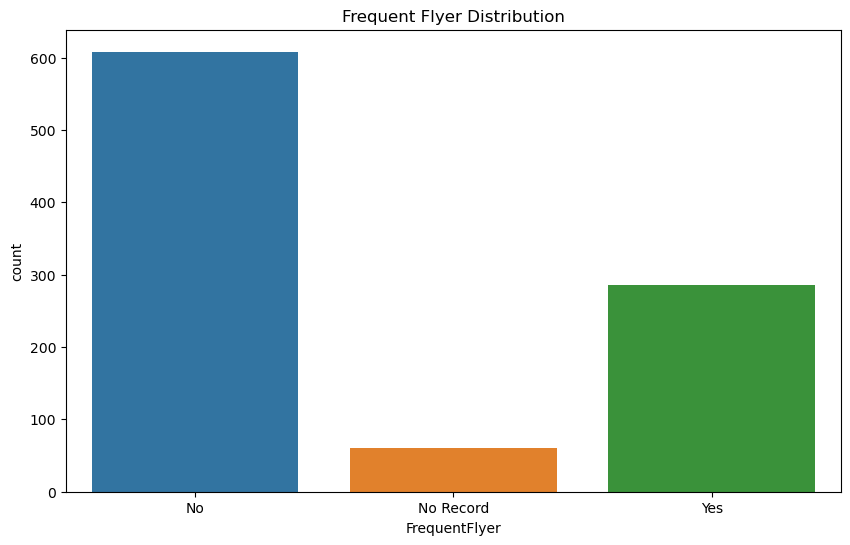

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FrequentFlyer', data=df)
plt.title('Frequent Flyer Distribution')
plt.show()

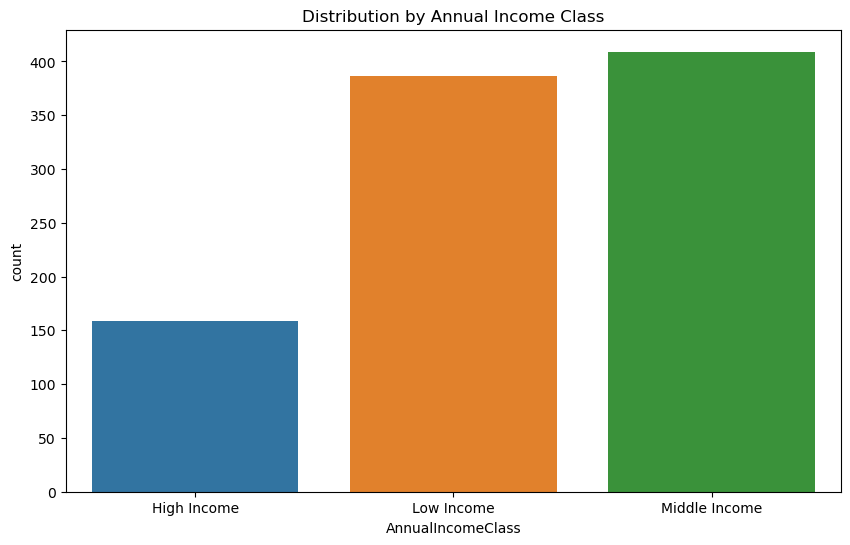

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AnnualIncomeClass', data=df)
plt.title('Distribution by Annual Income Class')
plt.show()

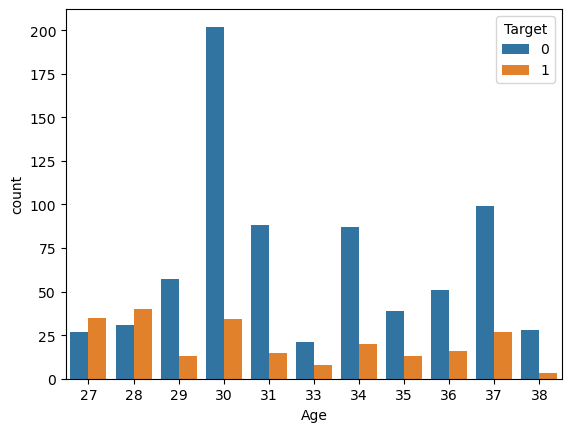

In [100]:
sns.countplot(x ='Age', hue = "Target", data = df)
 
# Show the plot
plt.show()

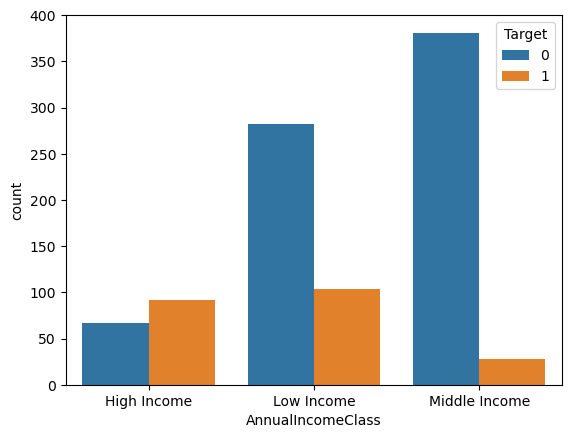

In [27]:
sns.countplot(x ='AnnualIncomeClass', hue = "Target", data = df)
# Show the plot
plt.show()

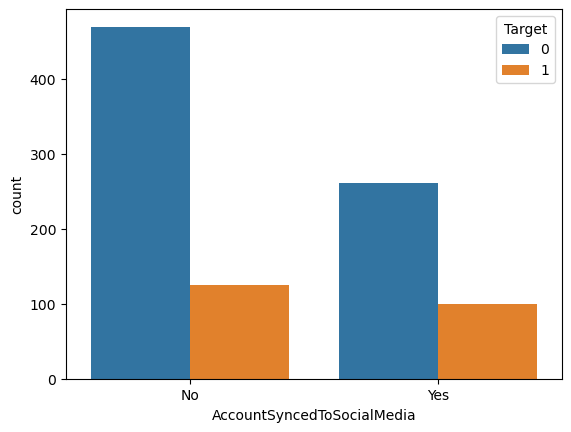

In [101]:
sns.countplot(x ='AccountSyncedToSocialMedia', hue = "Target", data = df)
# Show the plot
plt.show()

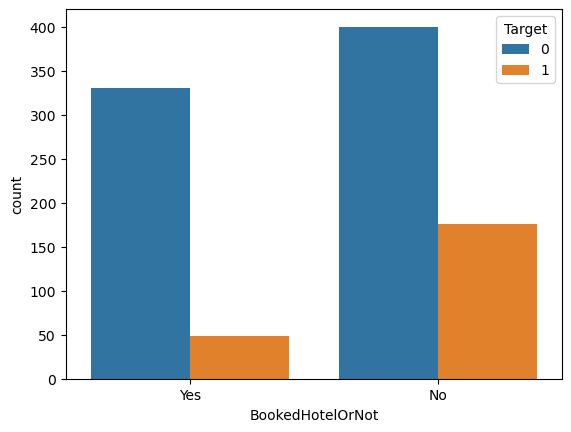

In [102]:
sns.countplot(x ='BookedHotelOrNot', hue = "Target", data = df)
# Show the plot
plt.show()

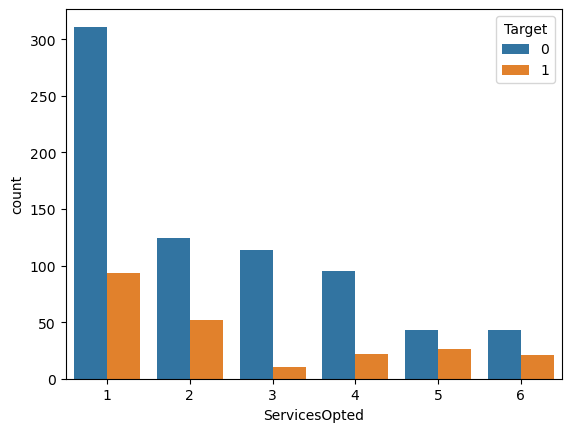

In [103]:
sns.countplot(x ='ServicesOpted', hue = "Target", data = df)
# Show the plot
plt.show()

## Pre-processing Data

In [33]:
#transform categorical variable
df['FrequentFlyer'] = df['FrequentFlyer'].astype('category')
df['AnnualIncomeClass'] = df['AnnualIncomeClass'].astype('category')
df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].astype('category')
df['BookedHotelOrNot'] = df['BookedHotelOrNot'].astype('category')
print(df.dtypes)

Age                              int64
FrequentFlyer                 category
AnnualIncomeClass             category
ServicesOpted                    int64
AccountSyncedToSocialMedia    category
BookedHotelOrNot              category
Target                           int64
dtype: object


In [38]:
#handling categorical data
df_churn = pd.DataFrame(df)
df_churn['FrequentFlyer'] = df_churn['FrequentFlyer'].cat.codes
df_churn['AnnualIncomeClass'] = df_churn['AnnualIncomeClass'].cat.codes
df_churn['AccountSyncedToSocialMedia'] = df_churn['AccountSyncedToSocialMedia'].cat.codes
df_churn['BookedHotelOrNot'] = df_churn['BookedHotelOrNot'].cat.codes

In [37]:
df_churn.head(5)

Age  FrequentFlyer  AnnualIncomeClass  ServicesOpted  \
0   34              0                  2              6   
1   34              2                  1              5   
2   37              0                  2              3   
3   30              0                  2              2   
4   30              0                  1              1   

   AccountSyncedToSocialMedia  BookedHotelOrNot  Target  
0                           0                 1       0  
1                           1                 0       1  
2                           1                 0       0  
3                           0                 0       0  
4                           0                 0       0

                                 Age  FrequentFlyer  AnnualIncomeClass  \
Age                         1.000000       0.034671           0.053149   
FrequentFlyer               0.034671       1.000000          -0.709380   
AnnualIncomeClass           0.053149      -0.709380           1.000000   
ServicesOpted              -0.012422      -0.164981           0.236364   
AccountSyncedToSocialMedia -0.016367      -0.084590           0.034744   
BookedHotelOrNot            0.024281      -0.189947           0.250833   
Target                     -0.131534       0.418672          -0.418092   

                            ServicesOpted  AccountSyncedToSocialMedia  \
Age                             -0.012422                   -0.016367   
FrequentFlyer                   -0.164981                   -0.084590   
AnnualIncomeClass                0.236364                    0.034744   
ServicesOpted                    1.000000                   -0.148655   
AccountSyncedToSocialMedia      -0.148655 

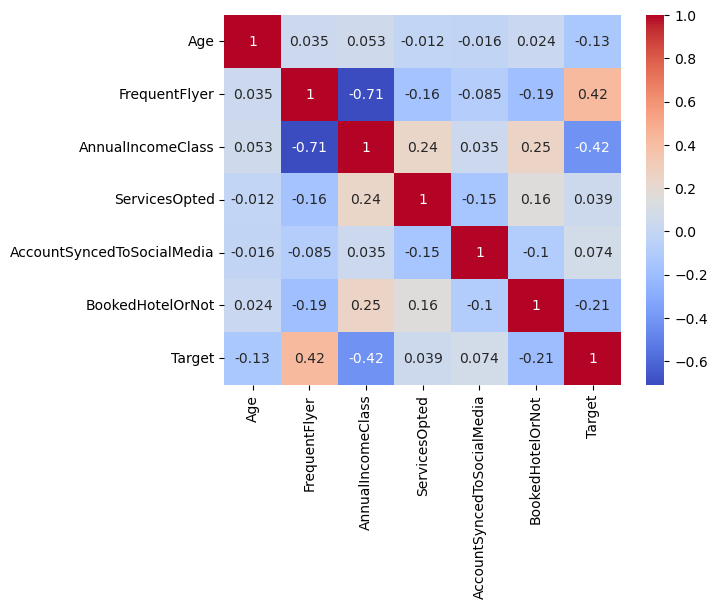

In [35]:
# Creating the correlation matrix dataset
df_churn_matrix = df_churn.corr()
print(df_churn_matrix)

# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(df_churn_matrix, cmap='coolwarm', annot=True)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

FrequentFlyer and AnnualIncomeClass have a strong negative correlation (-0.709380), confirming the potential multicollinearity 

Target variable has moderate positive correlations with FrequentFlyer (0.418672) and AccountsSyncedToSocialMedia (0.073831), and moderate negative correlations with AnnualIncomeClass (-0.418092) and BookedHotelOrNot (-0.206055). These variables are likely to be important predictors of customer churn.

Age has weak correlations with all other variables, with the strongest being a negative correlation with the Target variable (-0.131534). This suggests that Age might not be a significant predictor of churn.

ServicesOpted has relatively weak correlations with the Target variable (0.038646) and other predictors, indicating it may not contribute much to the predictive model.

In [39]:
# splitting into feature and label
X = df_churn.drop('Target',axis=1)
y = df_churn['Target']

In [40]:
# viewing the data
X.head()

Age  FrequentFlyer  AnnualIncomeClass  ServicesOpted  \
0   34              0                  2              6   
1   34              2                  1              5   
2   37              0                  2              3   
3   30              0                  2              2   
4   30              0                  1              1   

   AccountSyncedToSocialMedia  BookedHotelOrNot  
0                           0                 1  
1                           1                 0  
2                           1                 0  
3                           0                 0  
4                           0                 0

In [90]:
# splitting into train and test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((763, 6), (191, 6), (763,), (191,))

## Random Forest classifier

In [91]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
# Make predictions on the test data
y_pred = rf_model.predict(x_test)

In [93]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8743455497382199


## Decision Tree Classifier

In [94]:
# Instantiate the Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [95]:
# Make predictions on the test set
y_pred = tree_model.predict(x_test)

In [96]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9057591623036649


## XGBoost

In [97]:
# Instantiate the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [98]:
# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

In [99]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print accuracy
print("Accuracy:", accuracy)


Accuracy: 0.900523560209424


# Insight Analysis
## 1. Model performance comparison:

XGBoost, Random Forest and Decision Tree classifiers achieve high accuracy scores, indicating their effectiveness in predicting customer churn.

The Decision Tree model and XGBoost has a slightly higher accuracy (90.58%) compared to the Random Forest model (87.43%).
This suggests that the Decision Tree model and XGBoost may be marginally better at correctly predicting the churn status of customers in this dataset.

